In [1]:
import tkinter as tk
import pandas as pd
import numpy as np
import matplotlib.patches as mpatches
import matplotlib.pyplot as plt
import pyqtgraph as pg

import math
import random
import warnings
import sys

warnings.filterwarnings('ignore')

In [2]:
def plotTwoLabelData(dataFrame_Name, dfLength):
    
    plt.xlabel('x data')
    plt.ylabel('y data')
    for i in range(0, dfLength):
        if dataFrame_Name['2'][i] == 1.0:
            plt.scatter(dataFrame_Name['0'][i], dataFrame_Name['1'][i], c = 'r', marker = '.')
        elif dataFrame_Name['2'][i] == 2.0:
            plt.scatter(dataFrame_Name['0'][i], dataFrame_Name['1'][i], c = 'b', marker = '.')
            
    labelOne = mpatches.Patch(color='red', label='1')
    labelTwo = mpatches.Patch(color='blue', label='2')
    plt.legend(handles = [labelOne, labelTwo])

In [4]:
def sigmoid(z):
    return 1 / (1 + np.exp(-z))

In [5]:
def DataLogisticRegression(CSV_Name, stop_loss, stop_iteration, stop_trainIdenRate, stop_testIdenRate, lr):
    data_CSV = CSV_Name + '.CSV'
    data_df = pd.DataFrame(pd.read_csv(data_CSV, low_memory = False))
    
    # shuffle and split the data
    data_df = data_df.sample(frac=1).reset_index(drop=True)
    dataLength = len(data_df)
    trainData_df = data_df.loc['0':str(2*dataLength/3-1),'0':'2']             # train data
    testData_df  = data_df.loc[str(2*dataLength/3-1):dataLength,'0':'2']      # test data
    testData_df.reset_index(inplace=True)                                     # reset index 0~dataLength
    print("data length :",len(data_df))
    print("train data length :",len(trainData_df))
    print("test data length :",len(testData_df))
    
    # plot the Data chart
    plt.title('All Data')
    plotTwoLabelData(data_df, len(data_df))
    plt.show()
    plt.title('Training data')
    plotTwoLabelData(trainData_df, len(trainData_df))
    plt.show()
    plt.title('Test data')
    plotTwoLabelData(testData_df, len(testData_df))
    plt.show()
    
    # make dataframe to dict
    train_dict = trainData_df.to_dict(orient='dict')
    test_dict  = testData_df.to_dict(orient='dict')
    
    # 參數設定
    loss_train = 0
    loss_flag = True
    loss_history = []
    loss_test_history = []
    iteration = 0
    bias = random.uniform(0, 1)
    weight1 = random.uniform(0, 1)
    weight2 = random.uniform(0, 1)
    print("Original bias value is",bias)
    print("Original weight1 value is",weight1)
    print("Original weight2 value is",weight2)
    
    # 進行訓練
    while (loss_flag):
    
        train_predict = 0
        loss_train = 0
        loss_test = 0
        weight1_changeValue = 0
        weight2_changeValue = 0
        bias_changeValue = 0
        iteration = iteration + 1
    
        for i in range (len(trainData_df)):
            train_tempLabel = int(train_dict['2'][i]) - 1
        
            train_predict = sigmoid(bias + weight1*train_dict['0'][i] + weight2*train_dict['1'][i])
            loss_train = -( train_tempLabel*math.log(train_predict) + (1-train_tempLabel)*math.log(1-train_predict)) + loss_train
            weight1_changeValue = weight1_changeValue + (train_predict - train_tempLabel) * train_dict['0'][i]
            weight2_changeValue = weight2_changeValue + (train_predict - train_tempLabel) * train_dict['1'][i]
            bias_changeValue    = bias_changeValue    + (train_predict - train_tempLabel)
        
        for i in range (len(testData_df)):
            test_tempLabel = int(test_dict['2'][i]) - 1
        
            test_predict = sigmoid(bias + weight1*test_dict['0'][i] + weight2*test_dict['1'][i])
            loss_test = -( test_tempLabel *math.log(test_predict) + (1-test_tempLabel )*math.log(1-test_predict)) + loss_test
    
        weight1 = weight1 - lr/len(trainData_df) * weight1_changeValue  # renew the parameters
        weight2 = weight2 - lr/len(trainData_df) * weight2_changeValue
        bias    = bias - lr/len(trainData_df) * bias_changeValue
    
        loss_history.append(loss_train)
        loss_test_history.append(abs(loss_test))
        
        # 計算訓練集的辨識率
        correctNum_train = 0
        for i in range (len(trainData_df)):
            train_tempLabel = int(train_dict['2'][i]) - 1
            train_predict = sigmoid(bias + weight1*train_dict['0'][i] + weight2*train_dict['1'][i])
            if abs(train_tempLabel-train_predict) < 0.5:
                correctNum_train += 1
        trainIdenRate = correctNum_train/len(trainData_df)
        
        # 計算測試集的辨識率
        correctNum_test = 0
        for i in range (len(testData_df)):
            test_tempLabel = int(test_dict['2'][i]) - 1
            test_predict = sigmoid(bias + weight1*test_dict['0'][i] + weight2*test_dict['1'][i])
            if abs(test_tempLabel-test_predict) < 0.5:
                correctNum_test += 1
        testIdenRate = correctNum_test/len(testData_df)
                
        if(loss_train < stop_loss or iteration >= stop_iteration or trainIdenRate >= stop_trainIdenRate or testIdenRate >= stop_testIdenRate):
            loss_flag = False
            
    print("After bias value is",bias)
    print("After weight1 value is",weight1)
    print("After weight2 value is",weight2)
    print("\n")       
    print("Iteration is",iteration)       
    print("Train cross entropy",abs(loss_train))
    print("Train Identification rate :",correctNum_train/len(trainData_df))
    print("Test Identification rate :",correctNum_test/len(testData_df))
    print("All data Identification rate :",(correctNum_train + correctNum_test)/len(data_df))
    
    plt.title('Train cross entropy')
    plt.xlabel('Iteration')
    plt.ylabel('cross Entropy')
    plt.plot(range(1,len(loss_history)+1), loss_history, lw = 2, c='darkorange')
    plt.show()
    
    # 畫出分布樣貌
    xPoint = np.linspace(int(min(trainData_df['0'])-2), int(max(trainData_df['0'])+2), 30)
    yPoint = np.linspace(int(min(trainData_df['1'])-2), int(max(trainData_df['1'])+2), 30)
    predict = []
    for i in range(30):
        for j in range(30): 
            temp = sigmoid(bias + weight1 * xPoint[i] + weight2 * yPoint[j])
            if temp >= 0.5:
                plt.scatter(xPoint[i], yPoint[j], c = 'lightblue', marker = 'x')
            elif temp < 0.5:
                plt.scatter(xPoint[i], yPoint[j], c = 'lightpink', marker = 'x')
    
    # 畫出分野界線
    xPoint = np.linspace(int(min(trainData_df['0'])-2), int(max(trainData_df['0'])+2), 150)
    yPoint = np.linspace(int(min(trainData_df['1'])-2), int(max(trainData_df['1'])+2), 150)
    for i in range(150):
        for j in range(150):
            temp = sigmoid(bias + weight1 * xPoint[i] + weight2 * yPoint[j])
            if temp > 0.475 and temp < 0.525:
                plt.scatter(xPoint[i], yPoint[j], c = 'black', marker = '.')
                
    # 畫出資料點          
    plt.title('Logistic Regression')
    plt.xlabel('x data')
    plt.ylabel('y data')
    plotTwoLabelData(data_df, len(data_df))
    plt.show()
            

data length : 200
train data length : 133
test data length : 67


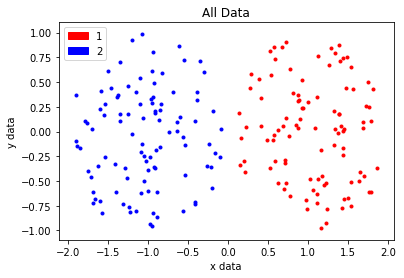

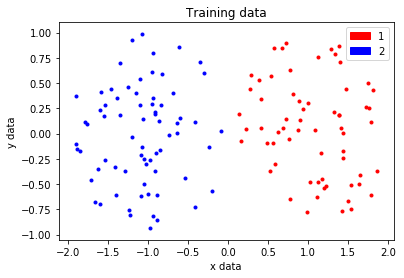

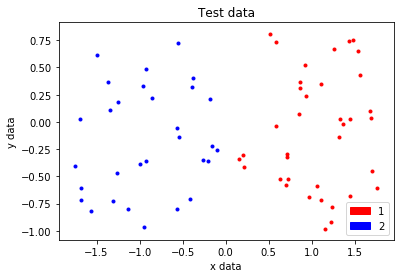

Original bias value is 0.7651283855890326
Original weight1 value is 0.00400390415674623
Original weight2 value is 0.32401095911686384
After bias value is -0.05135016402447702
After weight1 value is -4.7456406988995985
After weight2 value is -0.27504822870442586


Iteration is 1000
Train cross entropy 5.226019439278246
Train Identification rate : 1.0
Test Identification rate : 1.0
All data Identification rate : 1.0


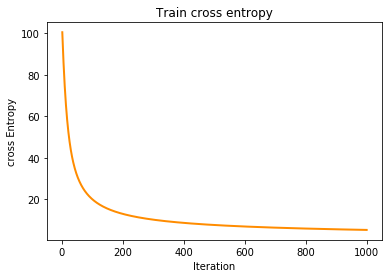

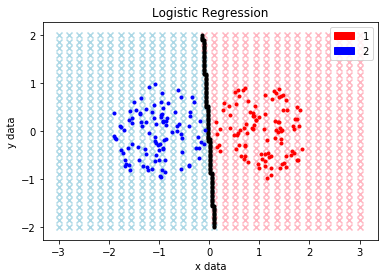

In [8]:
DataLogisticRegression('2CloseS', -1, 1000, 1.2, 1.2, 0.1)

data length : 200
train data length : 133
test data length : 67


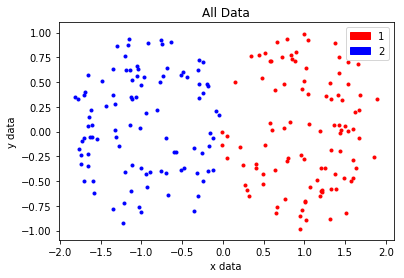

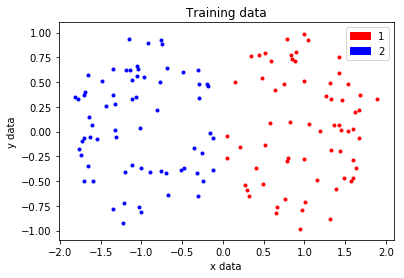

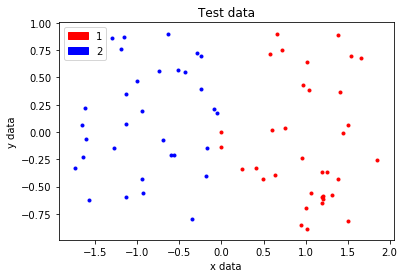

Original bias value is 0.16860025389770705
Original weight1 value is 0.32353434058199304
Original weight2 value is 0.5619135858859545
After bias value is 0.07756811092625383
After weight1 value is -4.867585079931829
After weight2 value is 0.16169906249640364


Iteration is 1000
Train cross entropy 8.004484215469175
Train Identification rate : 1.0
Test Identification rate : 0.9701492537313433
All data Identification rate : 0.99


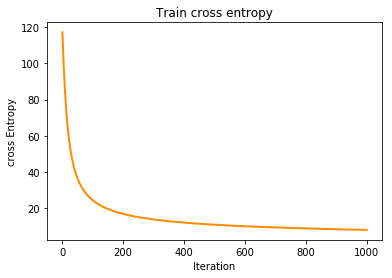

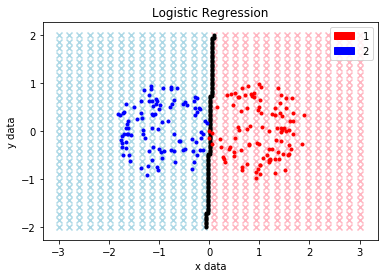

In [9]:
DataLogisticRegression('2CloseS2', -1, 1000, 1.2, 1.2, 0.1)